<a href="https://colab.research.google.com/github/laiyungseng/Tutorial2/blob/main/DataPrediction_Tutorial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem Statement**
The Goal of this project is to forecast the actual electricity price for the next hour. Accurate price prediction is crucial for energy companies to optimize their generation and trading strategies. We will use historical data including energy generation from various sources and load forecasts to build a predictuve model.

#Library installation

In [ ]:
!pip install kaggle

In [ ]:
#@title setup kaggle.json file

!rm /root/.kaggle
!mkdir /root/.kaggle
!mv /content/kaggle.json /root/.kaggle
#print(f"Done moving kaggle.json to /root/.kaggle")
!chmod 600 /root/.kaggle/kaggle.json


rm: cannot remove '/root/.kaggle': No such file or directory


In [ ]:
#@title download dataset from kaggle dataset
#!/bin/bash
!kaggle datasets download nicholasjhana/energy-consumption-generation-prices-and-weather --force

Dataset URL: https://www.kaggle.com/datasets/nicholasjhana/energy-consumption-generation-prices-and-weather
License(s): CC0-1.0
  0% 0.00/3.81M [00:00<?, ?B/s]
100% 3.81M/3.81M [00:00<00:00, 593MB/s]


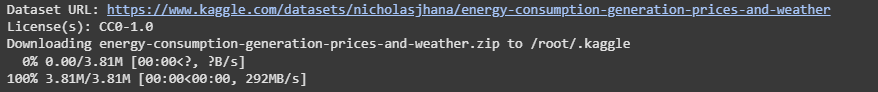

The file had transfer to filepath `/root/.kaggle`, the function below is to redirect the file back to `/content`

In [ ]:
#@title To verify the filepath
!ls /root/.kaggle

ls: cannot access '/root/.kaggle': No such file or directory


In [ ]:
#@title If the dataset is in the /root/.kaggle location use this function to move the file to /content

!mv /root/.kaggle/energy-consumption-generation-prices-and-weather.zip /content

In [ ]:
#unzip data
!unzip /content/energy-consumption-generation-prices-and-weather.zip

Archive:  /content/energy-consumption-generation-prices-and-weather.zip
  inflating: energy_dataset.csv      
  inflating: weather_features.csv    


In [ ]:
#@title if the csv is in /root path
!mv /root/.kaggle/energy_dataset.csv  /content/
print("done move energy_dataset.csv to content")
!mv /root/.kaggle/weather_features.csv /content
print("move weather features.csv to content")

mv: cannot stat '/root/.kaggle/energy_dataset.csv': No such file or directory
done move energy_dataset.csv to content
mv: cannot stat '/root/.kaggle/weather_features.csv': No such file or directory
move weather features.csv to content


In [ ]:
#@title Installing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
energy_pd = pd.read_csv('/content/energy_dataset.csv')
weather_pd = pd.read_csv('/content/weather_features.csv')

# Analysis1 on weather dataset

In [511]:
energy_pd=pd.read_csv("/content/energy_dataset.csv")
weather_pd=pd.read_csv("/content/weather_features.csv")

In [ ]:
#@title analysis on weather dataframe
weather_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object 
 15  weather_descripti

In [ ]:
weather_pd.isnull().sum()

,0
dt_iso,0
city_name,0
temp,0
temp_min,0
temp_max,0
pressure,0
humidity,0
wind_speed,0
wind_deg,0
rain_1h,0


In [558]:
energy_data = energy_pd.copy()

In [550]:
energy_data.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

In [551]:
energy_data.isnull().sum()

,0
time,0
generation biomass,19
generation fossil brown coal/lignite,18
generation fossil coal-derived gas,18
generation fossil gas,18
generation fossil hard coal,18
generation fossil oil,19
generation fossil oil shale,18
generation fossil peat,18
generation geothermal,18


In [559]:
#delete total empty columns
del_features = ['generation hydro pumped storage aggregated','generation wind offshore']
energy_data=energy_data.drop(columns=del_features)

In [560]:
energy_data=pd.DataFrame(energy_data)

In [561]:
merged_data = pd.merge(energy_data, weather_pd, left_index=True, right_index=True, how='inner')

In [565]:
#remove null value
merged_data.dropna(axis=1,inplace=True)
print(merged_data.isnull().sum())

time                               0
forecast solar day ahead           0
forecast wind onshore day ahead    0
total load forecast                0
price day ahead                    0
price actual                       0
dt_iso                             0
city_name                          0
temp                               0
temp_min                           0
temp_max                           0
pressure                           0
humidity                           0
wind_speed                         0
wind_deg                           0
rain_1h                            0
rain_3h                            0
snow_3h                            0
clouds_all                         0
weather_id                         0
weather_main                       0
weather_description                0
weather_icon                       0
dtype: int64


In [566]:
merged_data.head()

,time,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,price day ahead,price actual,dt_iso,city_name,temp,temp_min,...,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,17.0,6436.0,26118.0,50.10,65.41,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,...,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,16.0,5856.0,24934.0,48.10,64.92,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,...,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,8.0,5454.0,23515.0,47.33,64.48,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,...,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,2.0,5151.0,22642.0,42.27,59.32,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,...,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,9.0,4861.0,21785.0,38.41,56.04,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,...,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [571]:
#create hour, year, date datetime in the dataset
from datetime import datetime
datetimeseries =  pd.to_datetime(merged_data['time'],utc=True)
merged_data['date'] = datetimeseries.dt.date
merged_data['hour'] = datetimeseries.dt.hour
merged_data['year'] = datetimeseries.dt.year


In [572]:
for i in merged_data.columns:
  if merged_data[i].dtype == 'object':
    print(i)


time
dt_iso
city_name
weather_main
weather_description
weather_icon
date


In [575]:
#generate heatmap for this dataset
time_col = ['date', 'time','year', 'hour','dt_iso', 'weather_description', 'weather_main', 'weather_icon', 'city_name', 'rain_1h', 'rain_3h', 'snow_3h', 'clouds_all','weather_id']
new_mergeddata = merged_data.drop(columns=time_col)


In [576]:
new_mergeddata.columns

Index(['forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'price day ahead', 'price actual', 'temp',
       'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed',
       'wind_deg'],
      dtype='object')

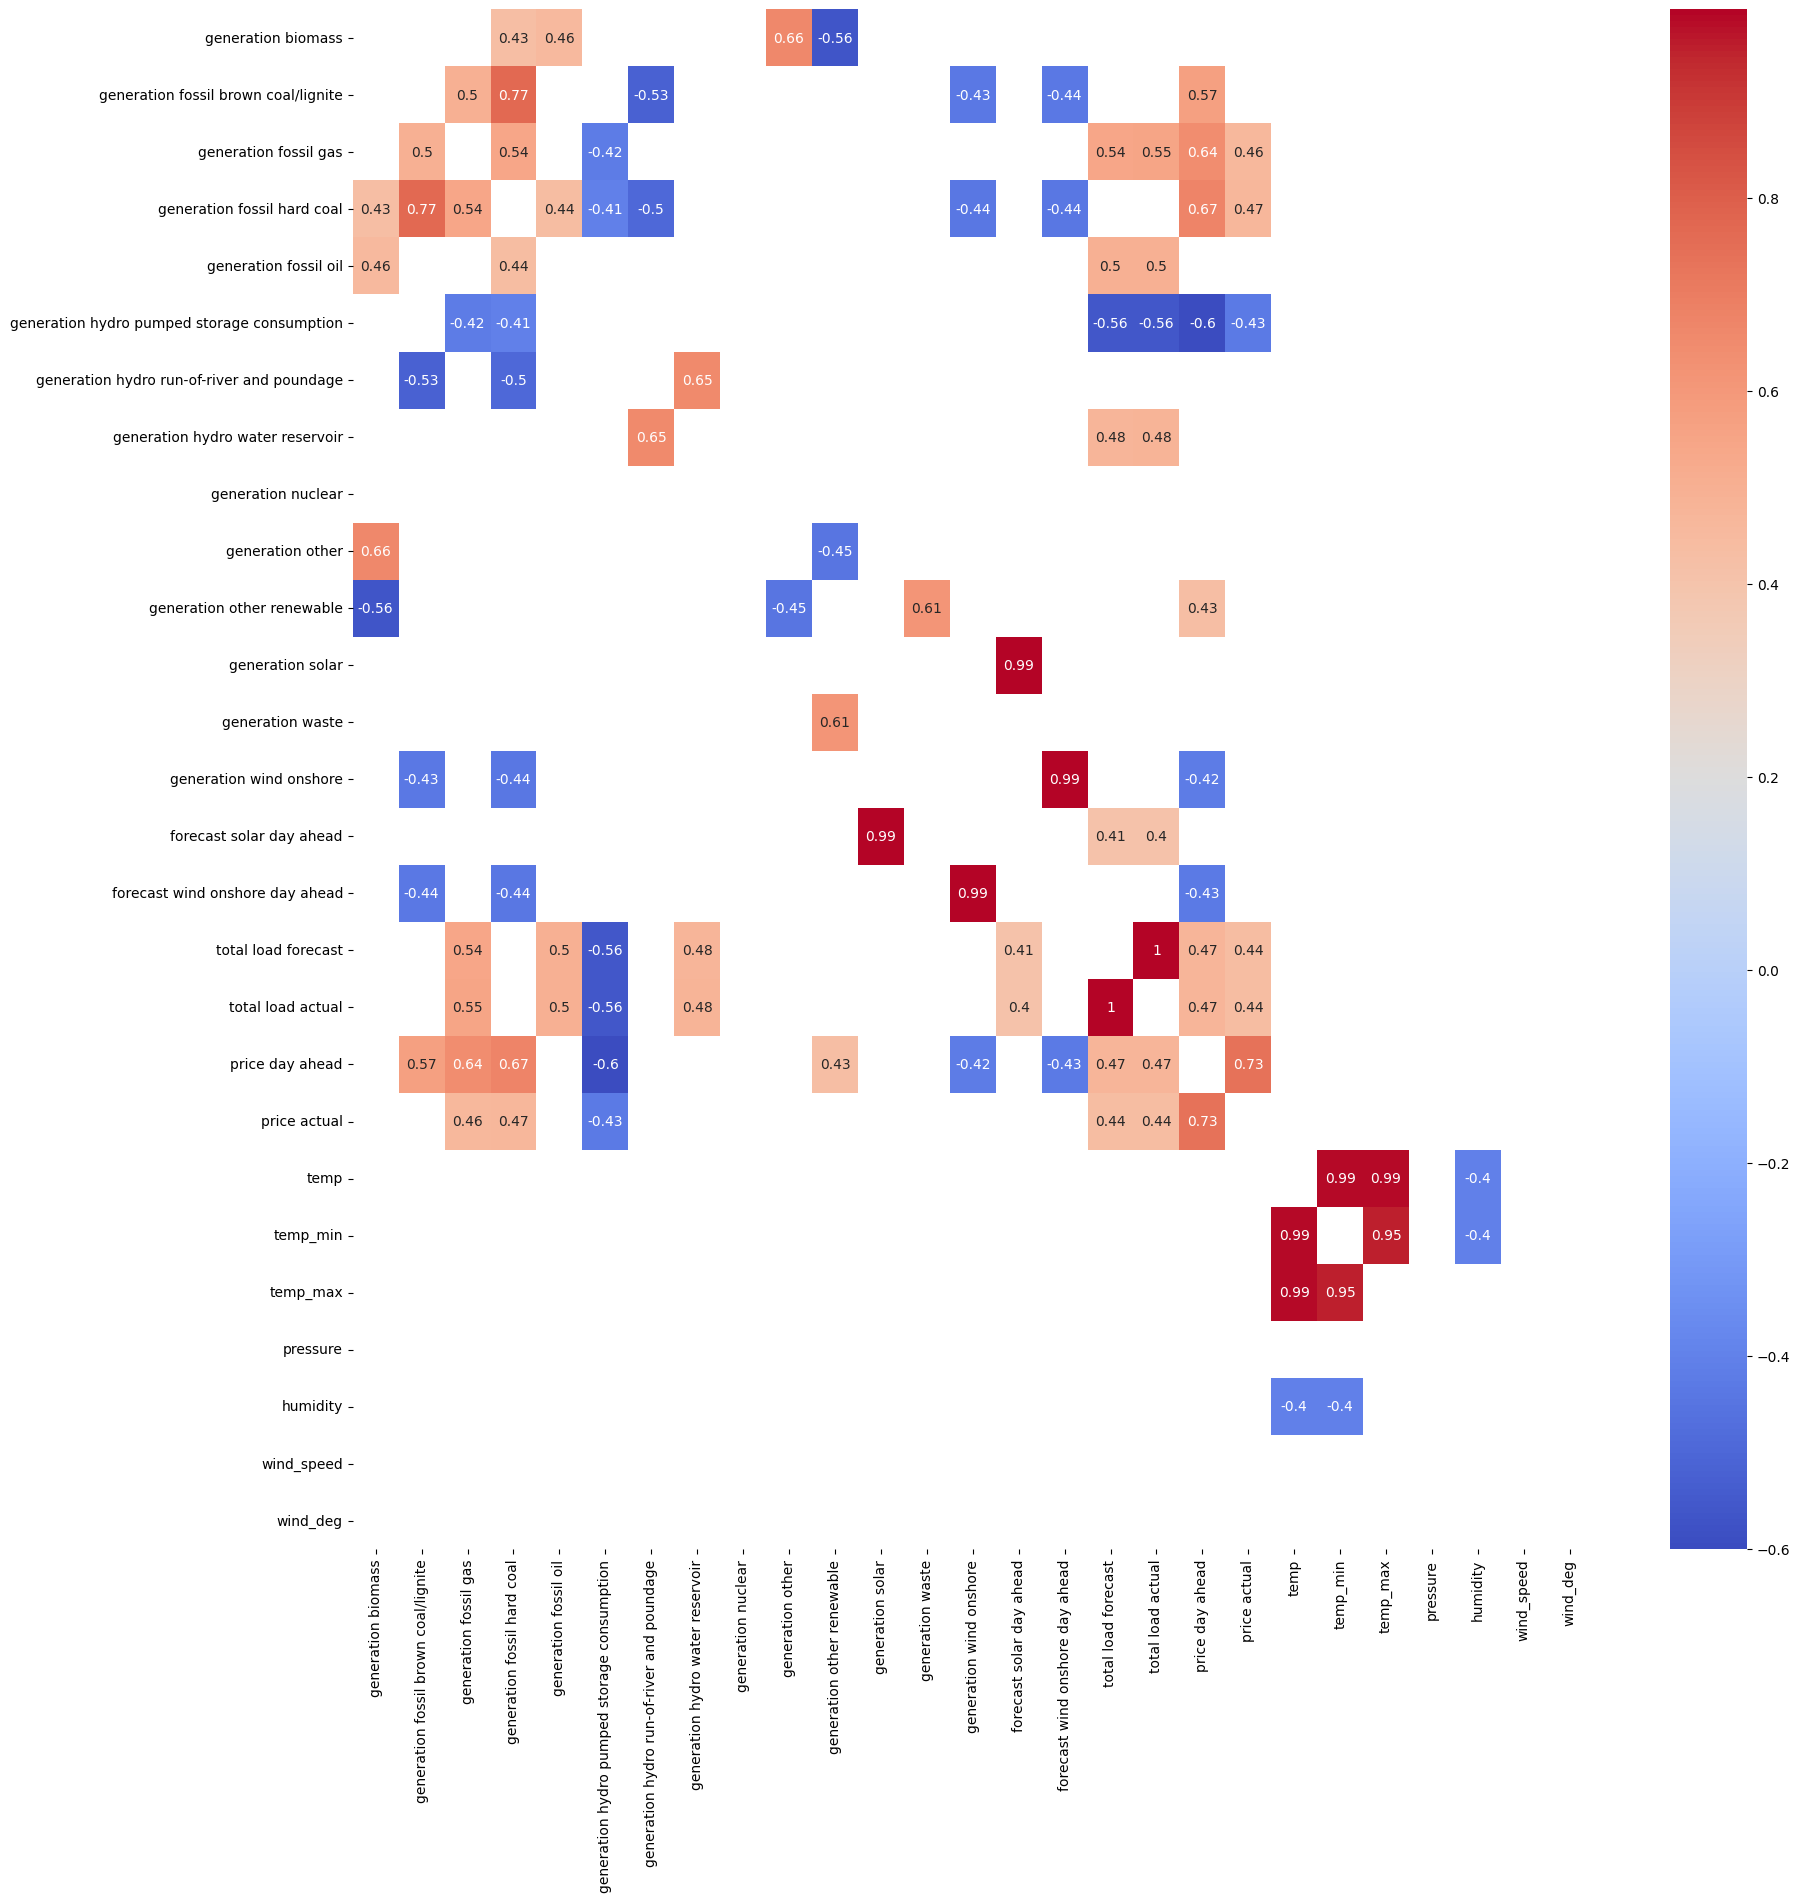

In [ ]:
#verify relationship between variable with heatmap
plt.figure(figsize=[20,20])
threshold = 0.4
merged_cor = new_mergeddata.corr()
filter_mergedcorr=merged_cor[(merged_cor.abs()>threshold) & (merged_cor.abs()<1.0)]
sns.heatmap(filter_mergedcorr, annot=True, cmap='coolwarm')

plt.show()

In [ ]:
#verify relationship between variable with statistic
x=new_mergeddata.corr(numeric_only=True)['price actual']
filtermergeddata = x[(x.abs()>0.4) & (x.abs()<1)]
print("---"*50)
print("Before threhold filter")
print("---"*50)
all_data = print(x)
print("---"*50)
print("After threhold filter")
print("---"*50)
print(filtermergeddata)


------------------------------------------------------------------------------------------------------------------------------------------------------
Before threhold filter
------------------------------------------------------------------------------------------------------------------------------------------------------
generation biomass                             0.142795
generation fossil brown coal/lignite           0.364205
generation fossil gas                          0.461914
generation fossil hard coal                    0.466703
generation fossil oil                          0.285351
generation hydro pumped storage consumption   -0.427033
generation hydro run-of-river and poundage    -0.136756
generation hydro water reservoir               0.072203
generation nuclear                            -0.051825
generation other                               0.099757
generation other renewable                     0.256400
generation solar                               0.098768
gen

In [ ]:
#extract variable that after threshold filter
filter_col = []

for i, col in enumerate(filtermergeddata.index):
  if filtermergeddata[i]>0:
    filter_col.append(col)

print(f"filtered variable: {filter_col}")

filtered variable: ['generation fossil gas', 'generation fossil hard coal', 'total load forecast', 'total load actual', 'price day ahead']


/tmp/ipython-input-40-1003738557.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if filtermergeddata[i]>0:


In [ ]:
traindata = merged_data[filter_col].copy()

In [ ]:
traindata2 = merged_data[time_cols].copy()

In [ ]:
traindata = pd.merge(traindata, traindata2, left_index=True, right_index=True, how='inner')



In [ ]:
traindata = pd.merge(traindata, merged_data['price actual'], left_index=True, right_index=True, how='inner')

In [ ]:
traindata=pd.DataFrame(traindata)


In [ ]:
traindata['price_pred_persistence'] = traindata['price actual'].shift(1)

In [ ]:
print(traindata.isnull().sum())

generation fossil gas          0
generation fossil hard coal    0
total load forecast            0
total load actual              0
price day ahead                0
time                           0
date                           0
hour                           0
price actual                   0
price_pred_persistence         1
dtype: int64


In [ ]:
#@title Baseline metric evaluation

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

df_eval = traindata.dropna(subset=['price_pred_persistence'])
Y_true_pers = df_eval['price actual']
Y_pred_pers = df_eval['price_pred_persistence']

#evaluatio baseline
RMSE_baseline = np.sqrt(mean_squared_error(Y_true_pers, Y_pred_pers))
MAE_baseline = mean_absolute_error(Y_true_pers, Y_pred_pers)
R2_baseline = r2_score(Y_true_pers, Y_pred_pers)

print(f"baseline RMSE:{RMSE_baseline:.2f}")
print(f"baseline MAE:{MAE_baseline}")
print(f"baseline R2:{R2_baseline:.4f}")

baseline RMSE:3.67
baseline MAE:2.5233809292629292
baseline R2:0.9332


In [ ]:
#checking is majority of data lag by single day
delta = traindata.index.to_series().diff().dropna()
print(delta.value_counts())


1.0    34986
2.0       27
7.0        1
3.0        1
4.0        1
9.0        1
Name: count, dtype: int64


In [ ]:
print(traindata.columns)

Index(['generation fossil gas', 'generation fossil hard coal',
       'total load forecast', 'total load actual', 'price day ahead', 'time',
       'date', 'hour', 'price actual', 'price_pred_persistence'],
      dtype='object')


In [ ]:
#set date as index
traindata1= traindata.set_index('date')

In [ ]:
#split train and test data
split_ratio = 0.8
split_index = int(len(traindata1)*split_ratio)

train = traindata1.iloc[:split_index]
test = traindata1.iloc[split_index:]

In [ ]:
#create different date range for training and testing
from datetime import datetime
cutoff=datetime.strptime('2018-01-01', '%Y-%m-%d').date()
train = traindata1[traindata1.index < cutoff]
test = traindata1[traindata1.index >= cutoff]

In [ ]:
#further split for x and y train test
X_train = train[filter_col]
Y_train = train['price actual']
X_test = test[filter_col]
Y_test = test['price actual']

In [ ]:
#create model
from sklearn.ensemble import RandomForestRegressor
model_rf1 = RandomForestRegressor(
    n_estimators=200,
    max_depth=5,
    random_state=42,
    min_samples_split=2,
    min_samples_leaf=2,
)

In [ ]:
#from traindataset
model_rf1.fit(X_train, Y_train)
y_pred1 = model_rf1.predict(X_test)

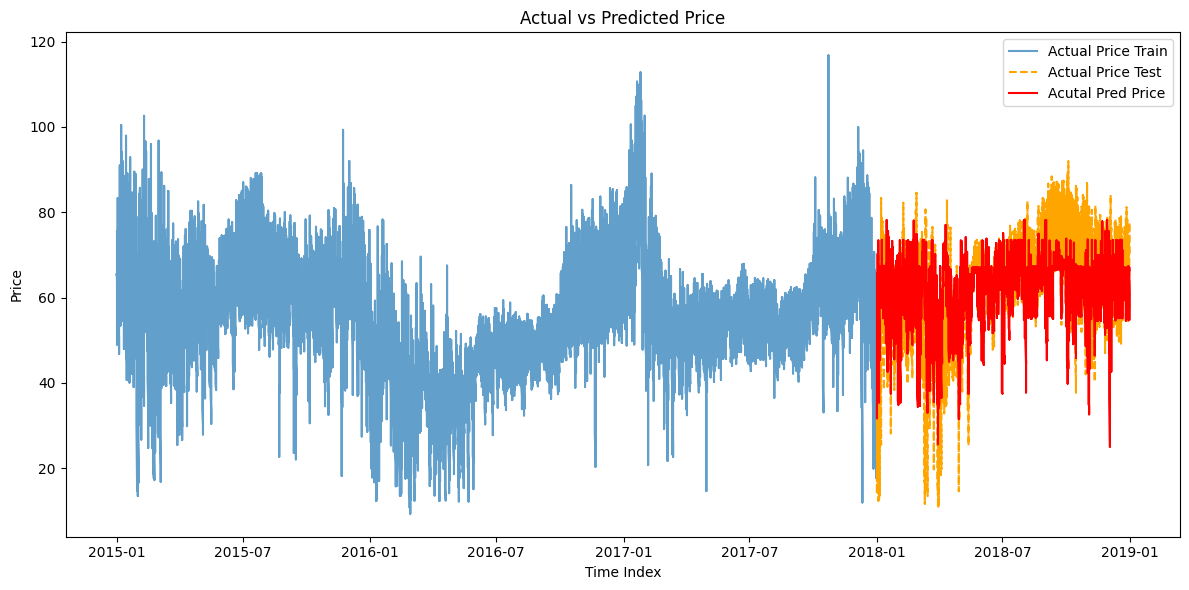


RMSE:9.46
RF1_MAE:89.42865453758678
RF1_R2:0.4001


In [ ]:
#plot graph for simulate actual and prediction
plt.figure(figsize=(12, 6))
plt.plot(Y_train.index, Y_train, label='Actual Price Train', alpha=0.7)
plt.plot(Y_test.index, Y_test, label='Actual Price Test', linestyle='--', color='orange')
plt.plot(Y_test.index, y_pred1, label='Acutal Pred Price', color='red')
plt.title('Actual vs Predicted Price')
plt.xlabel('Time Index')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()
##Evaluation error of the prediction model
RF1_RMSE = np.sqrt(mean_squared_error(Y_test, y_pred1))
RF1_MAE = mean_squared_error(Y_test,y_pred1)
RF1_R2 = r2_score(Y_test, y_pred1)
print(f"\nRMSE:{RF1_RMSE:.2f}")
print(f"RF1_MAE:{RF1_MAE}")
print(f"RF1_R2:{RF1_R2:.4f}")



Comparison between baseline and model_RF1

In [ ]:
print(f"baseline error details")
print({
    "RMSE_baseline":RMSE_baseline,
    "MAE_baseline":MAE_baseline,
    "R2_baseline":R2_baseline,
})
print("---"*50)
print(f"model_RF1 error details (train data from correlation matrix)")
print({
    "RF1_RMSE":RF1_RMSE,
    "RF1_MAE":RF1_MAE,
    "RF1_R2":RF1_R2,
})

baseline error details
{'RMSE_baseline': np.float64(3.6684356936770866), 'MAE_baseline': 2.5233809292629292, 'R2_baseline': 0.933166298394804}
------------------------------------------------------------------------------------------------------------------------------------------------------
model_RF1 error details (train data from correlation matrix)
{'RF1_RMSE': np.float64(9.456672487592387), 'RF1_MAE': 89.42865453758678, 'RF1_R2': 0.400147151165663}


The Best parameters for Random Forest regression is
```markdown
{
  'max_depth': 5,
  'min_samples_leaf':2,
  'min_samples_split':2,
  'n_estimatros': 200,
}
```

In [ ]:
#@title GridsearchCV HyperParameterTuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2
)
grid_search.fit(X_train, Y_train)
print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   8.7s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   8.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   8.9s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   4.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   4.7s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   4.2s
[CV] END max_depth=5, min_samples_leaf=

Fine-tuned Random Forest

In [ ]:
model_rf1 = RandomForestRegressor(
    n_estimators=200,
    max_depth=5,
    random_state=42,
    min_samples_split=2,
    min_samples_leaf=1,
)

In [ ]:
#from traindataset
model_rf1.fit(X_train, Y_train)
y_pred_finetuned = model_rf1.predict(X_test)

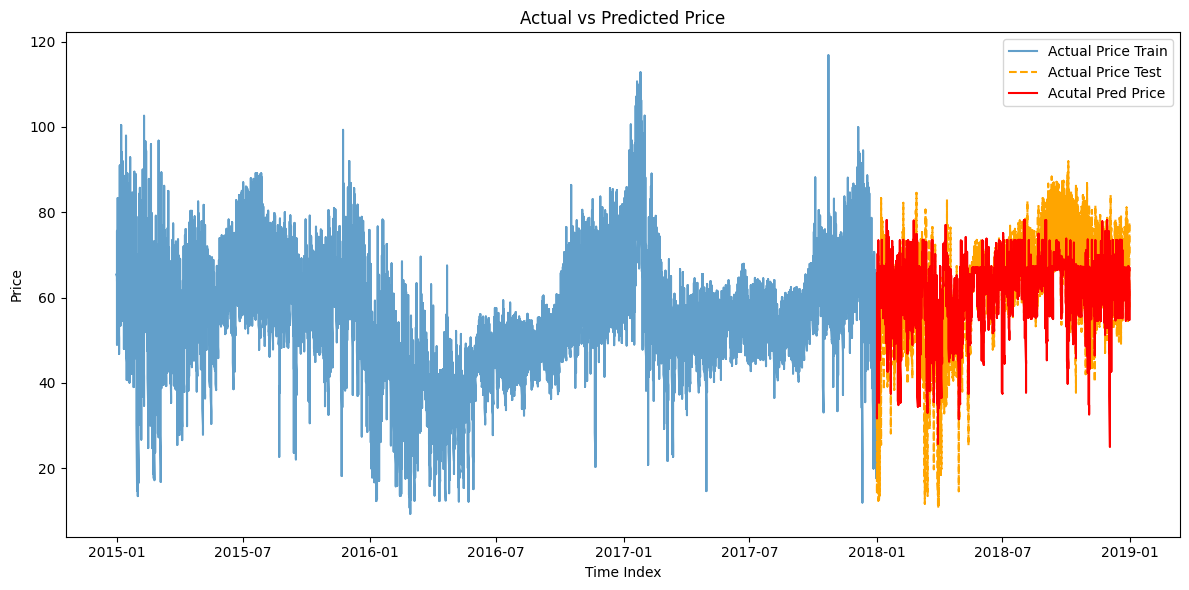


RMSE:9.46
RF1_MAE:89.41966933925852
RF1_R2:0.4002


In [ ]:
#plot graph for simulate actual and prediction
plt.figure(figsize=(12, 6))
plt.plot(Y_train.index, Y_train, label='Actual Price Train', alpha=0.7)
plt.plot(Y_test.index, Y_test, label='Actual Price Test', linestyle='--', color='orange')
plt.plot(Y_test.index, y_pred_finetuned, label='Acutal Pred Price', color='red')
plt.title('Actual vs Predicted Price')
plt.xlabel('Time Index')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()
##Evaluation error of the prediction model
RF1_RMSE_FT = np.sqrt(mean_squared_error(Y_test, y_pred_finetuned))
RF1_MAE_FT = mean_squared_error(Y_test,y_pred_finetuned)
RF1_R2_FT = r2_score(Y_test, y_pred_finetuned)
print(f"\nRMSE:{RF1_RMSE_FT:.2f}")
print(f"RF1_MAE:{RF1_MAE_FT}")
print(f"RF1_R2:{RF1_R2_FT:.4f}")

Comparison of coefficient with fine-tuned parameter

In [ ]:
print(f"baseline error details")
print({
    "RMSE_baseline":RMSE_baseline,
    "MAE_baseline":MAE_baseline,
    "R2_baseline":R2_baseline,
})
print("---"*50)
print(f"model_RF1 error details (train data from correlation matrix)")
print({
    "RF1_RMSE":RF1_RMSE,
    "RF1_MAE":RF1_MAE,
    "RF1_R2":RF1_R2,
})
print("---"*50)
print(f"model_RF1 error details (fine-tuned parameter)")
print({
    "RF1_RMSE_FT":RF1_RMSE_FT,
    "RF1_MAE_FT":RF1_MAE_FT,
    "RF1_R2_FT":RF1_R2_FT,
})

baseline error details
{'RMSE_baseline': np.float64(3.6684356936770866), 'MAE_baseline': 2.5233809292629292, 'R2_baseline': 0.933166298394804}
------------------------------------------------------------------------------------------------------------------------------------------------------
model_RF1 error details (train data from correlation matrix)
{'RF1_RMSE': np.float64(9.456197403780154), 'RF1_MAE': 89.41966933925852, 'RF1_R2': 0.4002074204031062}
------------------------------------------------------------------------------------------------------------------------------------------------------
model_RF1 error details (fine-tuned parameter)
{'RF1_RMSE_FT': np.float64(9.456197403780154), 'RF1_MAE_FT': 89.41966933925852, 'RF1_R2_FT': 0.4002074204031062}


**Dicussion on the Random Forest result**

The comparison of pre and post fine tuned with grid search show minimum different of improvement to the predicton result and also the coefficient. This shows that some of the features are having minimum impact to the target. Hence, the model have difficulties to learn the pattern from the feature.

Text(0.5, 1.0, 'Feature Importance - Random Forest')

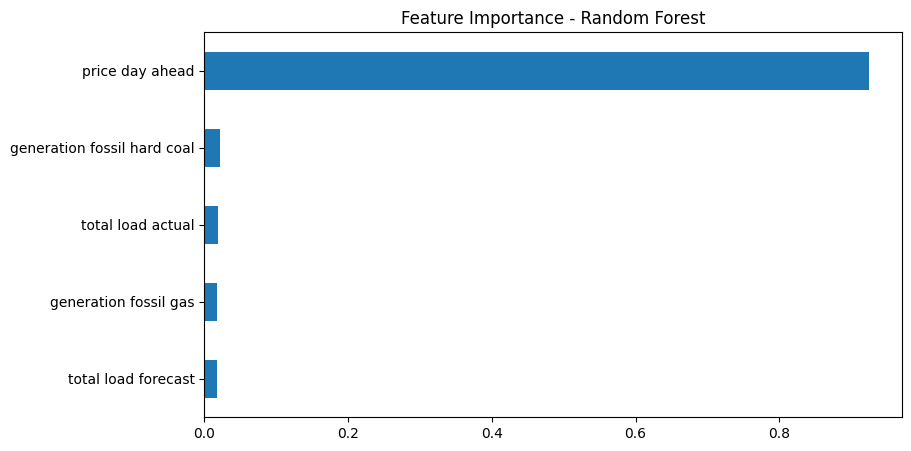

In [ ]:
##display importance variable
importances = pd.Series(model_rf1.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(9,5))
plt.title("Feature Importance - Random Forest")

Based on the figure shown in Feature importace, the result indicate that price day ahead has the highest impact on the price actual. Other than that, are have less than 0.2 index which is minimum influecne toward the target.

#Analysis 2
in this section will be using different analysis method to increase the model coefficient.

##Preprocessing dataset

In [ ]:
df1 = pd.read_csv('/content/energy_dataset.csv')

In [ ]:
df1.isnull().sum()

,0
time,0
generation biomass,19
generation fossil brown coal/lignite,18
generation fossil coal-derived gas,18
generation fossil gas,18
generation fossil hard coal,18
generation fossil oil,19
generation fossil oil shale,18
generation fossil peat,18
generation geothermal,18


In [ ]:
#drop the columns with complete null value
df1 = df1.drop(columns=['forecast wind offshore eday ahead','generation hydro pumped storage aggregated'], axis=1)

In [ ]:
df_clean = df1.dropna()

In [ ]:
df_clean.isnull().sum()

,0
time,0
generation biomass,0
generation fossil brown coal/lignite,0
generation fossil coal-derived gas,0
generation fossil gas,0
generation fossil hard coal,0
generation fossil oil,0
generation fossil oil shale,0
generation fossil peat,0
generation geothermal,0


In [ ]:
temp_df = df_clean.copy()

In [ ]:
#categorize out the fossil generation
fossil_cat = [col for col in temp_df.columns if 'fossil' in col]
print(fossil_cat)

['generation fossil brown coal/lignite', 'generation fossil coal-derived gas', 'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil', 'generation fossil oil shale', 'generation fossil peat']


In [ ]:
temp_df=temp_df.drop(columns=fossil_cat, axis=1)

In [ ]:
#categorize out the renewable energy
renewable_source = ['solar', 'wind', 'biomass','waste', 'hydro','renewable','geothermal']
renewable_cat = [col for col in temp_df.columns for x in renewable_source if x in col]
print(renewable_cat)

['generation biomass', 'generation geothermal', 'generation hydro pumped storage consumption', 'generation hydro run-of-river and poundage', 'generation hydro water reservoir', 'generation other renewable', 'generation solar', 'generation waste', 'generation wind offshore', 'generation wind onshore', 'forecast solar day ahead', 'forecast wind onshore day ahead']


In [ ]:
temp_df=temp_df.drop(columns=renewable_cat, axis=1)

In [ ]:
remove_features = ['generation hydro pumped storage consumption','generation wind offshore','generation waste']
for rmv in remove_features:
  if rmv in renewable_cat:
    renewable_cat.remove(rmv)

In [ ]:
print(renewable_cat)

['generation biomass', 'generation geothermal', 'generation hydro run-of-river and poundage', 'generation hydro water reservoir', 'generation other renewable', 'generation solar', 'generation wind onshore', 'forecast solar day ahead', 'forecast wind onshore day ahead']


In [ ]:
#categorize other
other_source = ['marine', 'nuclear', 'generation other']
other_cat = [col for col in temp_df.columns for x in other_source if x in col]
print(other_cat)

['generation marine', 'generation nuclear', 'generation other']


In [ ]:
temp_df=temp_df.drop(columns=other_cat, axis=1)


In [ ]:
for i in range(len(other_cat)):
  if 'generation marine' in other_cat[i]:
      other_cat.pop(i)


In [ ]:
print(other_cat)

['generation nuclear', 'generation other']


In [ ]:
fossil= np.sum(df_clean[fossil_cat],axis=1)
renewable = np.sum(df_clean[renewable_cat],axis=1)
other = np.sum(df_clean[other_cat],axis=1)
#

In [ ]:
#merge new variable in a single dataframe
newdf1 = pd.DataFrame({
    'fossil': fossil,
    'renewable': renewable,
    'other': other,
})

In [ ]:
newdf1.columns

Index(['fossil', 'renewable', 'other'], dtype='object')

In [ ]:
temp_df.columns

Index(['time', 'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

In [ ]:
#create new dataset
newdf = temp_df.copy()

In [ ]:
print(newdf.columns)

Index(['time', 'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')


In [ ]:
## merge 2 data into single dataframe
newdf = pd.concat([newdf, newdf1], axis=1)
print(newdf.columns)

Index(['time', 'total load forecast', 'total load actual', 'price day ahead',
       'price actual', 'fossil', 'renewable', 'other'],
      dtype='object')


In [ ]:
print(newdf.drop(columns=['time']).columns)

Index(['total load forecast', 'total load actual', 'price day ahead',
       'price actual', 'fossil', 'renewable', 'other'],
      dtype='object')


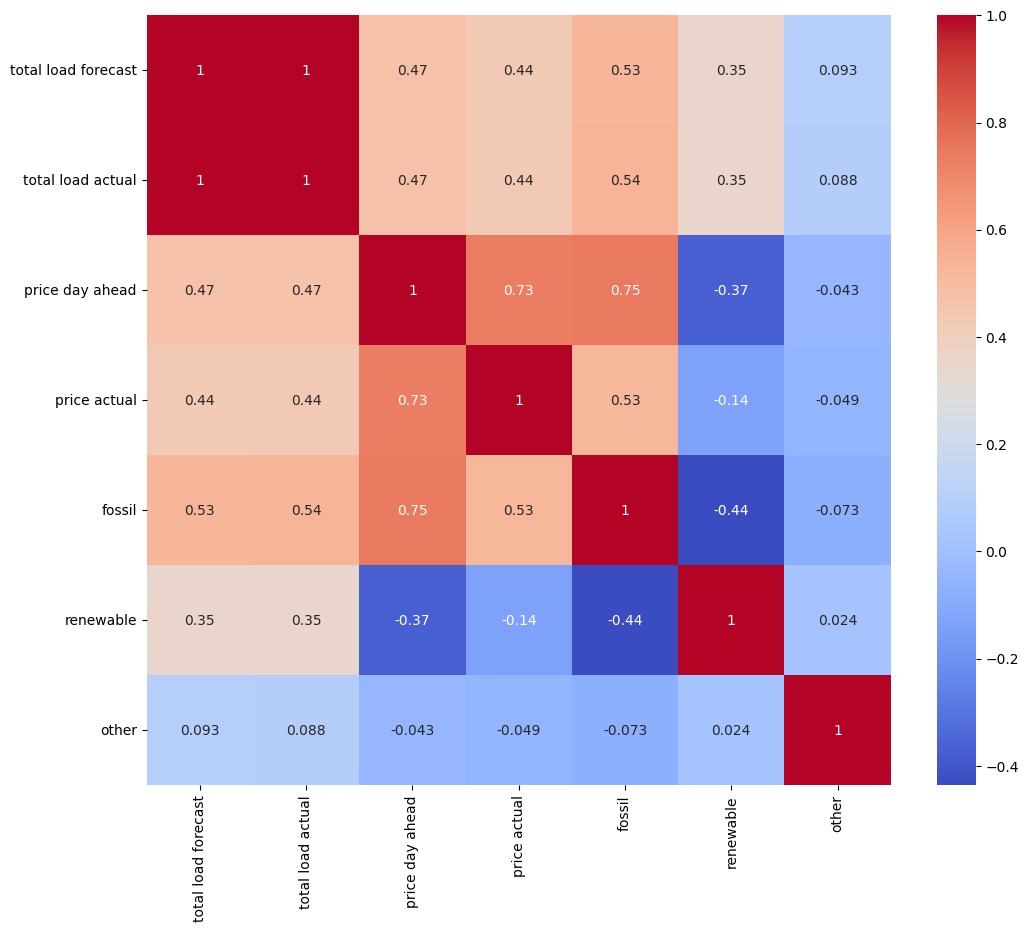

In [ ]:
df_corr = newdf.drop(columns=['time']).corr()
plt.figure(figsize=(12,10))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.show()

Based on the heatmap,

if the target is price actual, the highest correlation is 0.73 which is price day ahead, second highest is fossil and lastly total load forecast and total load actual has a evenly value of 0.44. the remaining features will be ignore since its either negative value or 1. These value will not contribute significant influence to model.

In [ ]:
#setting threshold to filter out low correlation features with against price actual
threshold= 0.4
x = newdf.drop(columns=['time']).corr(numeric_only=True)['price actual']
filtered_corr= x[(x.abs()>threshold) & (x.abs()<1.0)]
print(filtered_corr.index)

Index(['total load forecast', 'total load actual', 'price day ahead',
       'fossil'],
      dtype='object')


In [ ]:
filtered_col = [col for col in filtered_corr.index]

print(filtered_col)

['total load forecast', 'total load actual', 'price day ahead', 'fossil']


In [ ]:
#combine filtered col and time in a single dataset
traindataset1 = newdf[filtered_col].copy()
traindataset2 = newdf['time'].copy()
traindataset = pd.concat([traindataset2,traindataset1],axis=1)
traindataset['price'] = newdf['price actual'].copy()

In [ ]:
#check null number in new dataset
traindataset.isnull().sum()

,0
time,0
total load forecast,0
total load actual,0
price day ahead,0
fossil,0
price,0


In [ ]:
traindataset = pd.DataFrame(traindataset)

In [ ]:
#create train dataset and make time as index
##create date, month, year in dataset
from datetime import datetime

traindataset['time'] = pd.to_datetime(traindataset['time'], utc=True)
traindataset['date']= pd.to_datetime(traindataset['time'],utc=True).dt.date
traindataset['month']=pd.to_datetime(traindataset['time'],utc=True).dt.month
traindataset['year']=pd.to_datetime(traindataset['time'],utc=True).dt.year
traindataset['hour']=pd.to_datetime(traindataset['time'], utc=True).dt.hour
traindataset['day']=pd.to_datetime(traindataset['time'], utc=True).dt.day
traindataset['dayofweek']=pd.to_datetime(traindataset['time'], utc=True).dt.dayofweek


In [ ]:
traindataset.set_index('time', inplace=True)

In [ ]:
traindataset.index

Index(['2015-01-01 00:00:00+01:00', '2015-01-01 01:00:00+01:00',
       '2015-01-01 02:00:00+01:00', '2015-01-01 03:00:00+01:00',
       '2015-01-01 04:00:00+01:00', '2015-01-01 05:00:00+01:00',
       '2015-01-01 06:00:00+01:00', '2015-01-01 07:00:00+01:00',
       '2015-01-01 08:00:00+01:00', '2015-01-01 09:00:00+01:00',
       ...
       '2018-12-31 14:00:00+01:00', '2018-12-31 15:00:00+01:00',
       '2018-12-31 16:00:00+01:00', '2018-12-31 17:00:00+01:00',
       '2018-12-31 18:00:00+01:00', '2018-12-31 19:00:00+01:00',
       '2018-12-31 20:00:00+01:00', '2018-12-31 21:00:00+01:00',
       '2018-12-31 22:00:00+01:00', '2018-12-31 23:00:00+01:00'],
      dtype='object', name='time', length=35017)

In [ ]:
#split data by index(date)
date_threshold = datetime.strptime('2018-01-01', '%Y-%m-%d').date()

train = traindataset[traindataset.index<date_threshold]
test = traindataset[traindataset.index>date_threshold]

In [ ]:
train.index
print(train.columns)

Index(['time', 'total load forecast', 'total load actual', 'price day ahead',
       'fossil', 'price', 'month', 'year'],
      dtype='object')


In [ ]:
test.index

Index([2018-01-02, 2018-01-02, 2018-01-02, 2018-01-02, 2018-01-02, 2018-01-02,
       2018-01-02, 2018-01-02, 2018-01-02, 2018-01-02,
       ...
       2018-12-31, 2018-12-31, 2018-12-31, 2018-12-31, 2018-12-31, 2018-12-31,
       2018-12-31, 2018-12-31, 2018-12-31, 2018-12-31],
      dtype='object', name='date', length=8733)

In [ ]:
#split traindataset into X_train, X_test, Y_train, Y_test
X_train = train.drop(columns=['month','time', 'price', 'year'])
Y_train = train['price']
X_test = test.drop(columns=['month','time', 'price', 'year'])
Y_test = test['price']

In [ ]:
#verify train feature
print(f"Xtraincolumns: {len(X_train)}")
print(f"Ytraincolumns: {len(Y_train)}")

Xtraincolumns: 26260
Ytraincolumns: 26260


In [ ]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

model_RF1 = RandomForestRegressor(
    n_estimators=200,
    max_depth=5,
    random_state=42,
    min_samples_split=2,
    min_samples_leaf=2,
)

model_RF1.fit(X_train, Y_train)
Y_predRF1 = model_RF1.predict(X_test)

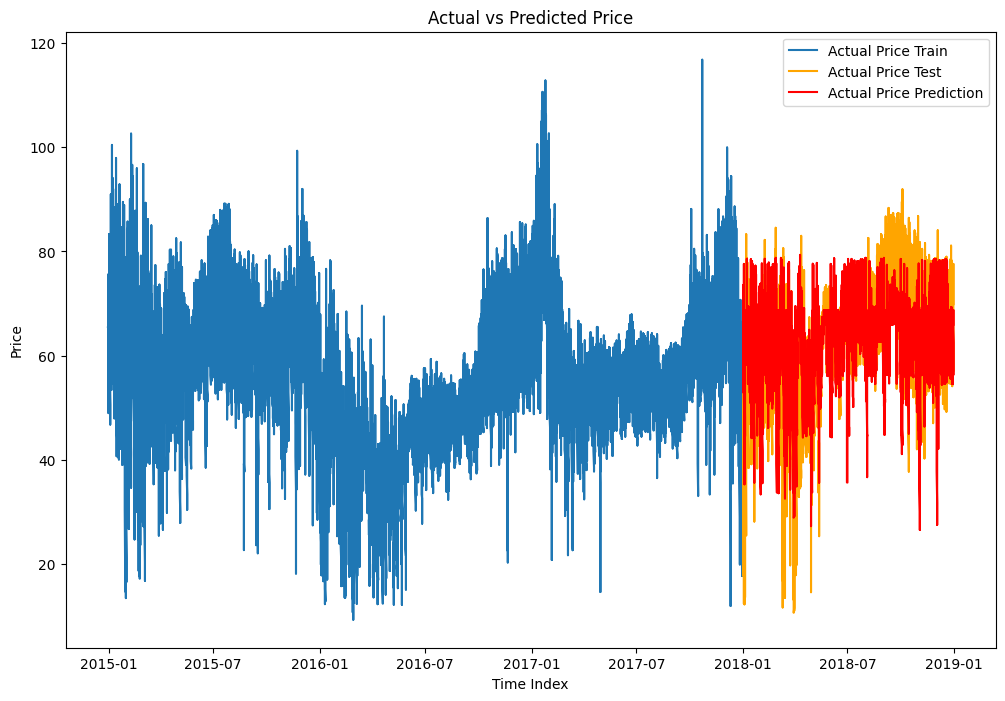


RMSE:9.39
RF1_MAE:88.11307405987934
RF1_R2:0.3903


In [ ]:
plt.figure(figsize=(12,8))
plt.plot(Y_train.index,Y_train, label='Actual Price Train')
plt.plot(Y_test.index, Y_test, label='Actual Price Test', color='orange')
plt.plot(Y_test.index, Y_predRF1, label='Actual Price Prediction', color='red')
plt.title('Actual vs Predicted Price')
plt.xlabel('Time Index')
plt.ylabel('Price')
plt.legend()
plt.show()
###Evalation metrix
RF1_RMSE = np.sqrt(mean_squared_error(Y_test, Y_predRF1))
RF1_MAE = mean_squared_error(Y_test,Y_predRF1)
RF1_R2 = r2_score(Y_test, Y_predRF1)

print(f"\nRMSE:{RF1_RMSE:.2f}")
print(f"RF1_MAE:{RF1_MAE}")
print(f"RF1_R2:{RF1_R2:.4f}")


Based from the figure shows presenting the prediction from random forest regression. The predict result are consider identical to the test dataset. But predict result does not show the increasing trend like test result. This shows that the model has difficulties to learn the dataset patterns. The R2 shows 0.3903, this indicate the model has low prediction capabilites. Furthermore, a RMSE of 9.39 represent a 9.39 price different compare to the actual price from the dataset. Lastly, a 88.11 mean absolute error was shown in the evaluation matrix. This might indicate a wide spread of data distribution in the dateset causing model to have difficulties to capture the pattern of dataset.

In [ ]:
#print data within 24hour
from datetime import datetime, timedelta

def set_period(df, date: str="2015-01-01", temp_period: str="month"):
  sel_temp_period = ['month', 'year', 'hour']
  if  temp_period not in sel_temp_period:
    temp_period = "month"

  if date is None:
    date = '2015-01-01'
  print(f"select {temp_period}, digesting dataset...")
  traindataset=df.reset_index()

  if temp_period == "month":
    monthly_means  = traindataset.groupby(['year', 'month']).mean(numeric_only=True)
    monthly_means_reset = monthly_means.reset_index()
    # Create full datetime for each (year, month) pair
    monthly_means_reset['date'] = pd.to_datetime({
        'year': monthly_means_reset['year'],
        'month': monthly_means_reset['month'],
        'day': 1  # Use day=1 to represent each month
    })
    monthly_means_reset.set_index('date', inplace=True)
    print(f'printing dataset {temp_period} period')
    return monthly_means_reset

  elif temp_period == 'hour':
      traindataset.set_index('time',inplace=True)
      traindataset.index = pd.to_datetime(traindataset.index, utc=True)
      #set start time
      startdatetime = pd.Timestamp(f"{date} 00:00:00", tz='UTC')
      print(f"start datetime:{startdatetime}")
      #set end time
      enddatetime = startdatetime + timedelta(hours=24)
      enddatetime = pd.Timestamp(enddatetime).tz_convert('UTC')
      print(f"end datetime:{enddatetime}")
      #create range with 24Hperiod
      period24H = traindataset[(traindataset.index>=startdatetime)&(traindataset.index<=enddatetime)]
      if 'index' in period24H.columns:
        period24H = period24H.drop(columns=['index'])
      print(f'printing dataset {temp_period} period')
      print(period24H)
      return period24H

  elif temp_period =='year':
      yearly_means = traindataset.groupby(['year']).mean(numeric_only=True)
      yearly_means_reset = yearly_means.reset_index()
      yearly_means_reset.set_index('year', inplace=True)
      if 'index' in yearly_means_reset.columns:
        yearly_means_reset = yearly_means_reset.drop(columns=['index'])
      print(f'printing dataset with {temp_period} period')
      return yearly_means_reset

  else:
    print("Invalid period")


In [ ]:
z=set_period(df=traindataset,temp_period="month")

select month, digesting dataset...
printing dataset month period


In [ ]:
##train with monthyl dataset
# filter out the unnecessary features
del_feature = ['day', 'dayofweek', 'index','hour']
for i in del_feature:
  if i in z.columns:
     z = z.drop(columns=i)


In [ ]:
print(z.columns)

Index(['year', 'month', 'total load forecast', 'total load actual',
       'price day ahead', 'fossil', 'price'],
      dtype='object')


In [ ]:
print(z)

            year  month  total load forecast  total load actual  \
date                                                              
2014-12-01  2014     12         26118.000000       25385.000000   
2015-01-01  2015      1         30147.562074       29972.744884   
2015-02-01  2015      2         29610.776097       29478.727685   
2015-03-01  2015      3         28385.888441       28431.045699   
2015-04-01  2015      4         27450.400838       27438.268156   
2015-05-01  2015      5         27523.331536       27460.013477   
2015-06-01  2015      6         27962.966620       28048.340751   
2015-07-01  2015      7         30581.713710       30508.004032   
2015-08-01  2015      8         27743.568548       27723.881720   
2015-09-01  2015      9         27815.675000       27739.291667   
2015-10-01  2015     10         27655.289757       27617.249326   
2015-11-01  2015     11         28237.765278       28268.579167   
2015-12-01  2015     12         27758.130552       27656.08075

In [ ]:
#split the dataset by date
cutoff=datetime.strptime('2018-01-01', '%Y-%m-%d')
train = z[z.index<cutoff]
test = z[z.index>cutoff]

In [ ]:
#split data by train and test
X_train1 = train.drop(columns=['price','year','month'])
Y_train1 = train['price'].values
X_test1 = test.drop(columns=['price','year','month'])
Y_test1 = test['price'].values
#

In [ ]:
X_train1.index

DatetimeIndex(['2014-12-01', '2015-01-01', '2015-02-01', '2015-03-01',
               '2015-04-01', '2015-05-01', '2015-06-01', '2015-07-01',
               '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01',
               '2015-12-01', '2016-01-01', '2016-02-01', '2016-03-01',
               '2016-04-01', '2016-05-01', '2016-06-01', '2016-07-01',
               '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01',
               '2016-12-01', '2017-01-01', '2017-02-01', '2017-03-01',
               '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
               '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01',
               '2017-12-01'],
              dtype='datetime64[ns]', name='date', freq=None)

In [ ]:
#convertion
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#X_train1 = scaler.fit_transform(X_train1)
#X_test1 = scaler.fit_transform(X_test1)

In [ ]:
#grid search for finetune parameter
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200,300,],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2
)
grid_search.fit(X_train1, Y_train1)
print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model_RF2 = RandomForestRegressor(
    n_estimators=100,
    max_depth=5,
    random_state=42,
    min_samples_split=2,
    min_samples_leaf=1,
)
model_RF2.fit(X_train1, Y_train1)
Ypred2=model_RF2.predict(X_test1)

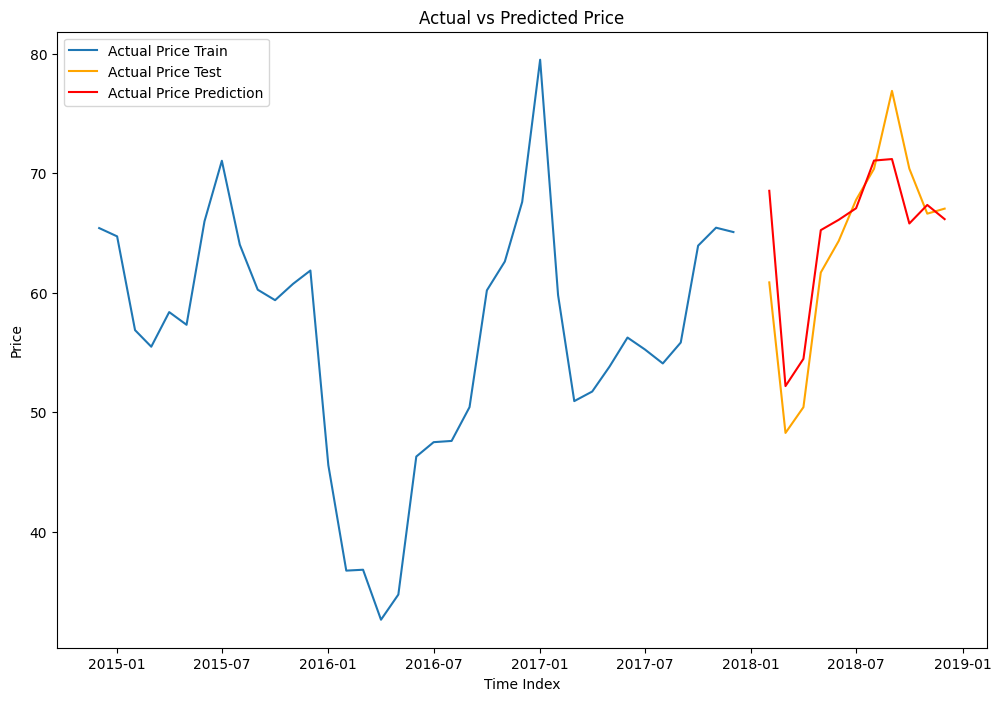


RMSE:3.84
RF2_MAE:14.750879603718271
RF2_R2:0.7764


In [582]:
#plot actual vs prediction based on 24H
plt.figure(figsize=(12,8))
plt.plot(X_train1.index, Y_train1, label='Actual Price Train')
plt.plot(X_test1.index,Y_test1, label='Actual Price Test', color='orange')
plt.plot(X_test1.index, Ypred2, label='Actual Price Prediction', color='red')
plt.title('Actual vs Predicted Price')
plt.xlabel('Time Index')
plt.ylabel('Price')
plt.legend()
plt.show()

##evaluation metric
RF2_RMSE = np.sqrt(mean_squared_error(Y_test1, Ypred2))
RF2_MAE = mean_squared_error(Y_test1,Ypred2)
RF2_R2 = r2_score(Y_test1, Ypred2)

print(f"\nRMSE:{RF2_RMSE:.2f}")
print(f"RF2_MAE:{RF2_MAE}")
print(f"RF2_R2:{RF2_R2:.4f}")

based on the random forest regression result, the input features are filtered by monthly based. The evaluation metrics shows a RMSE of 3.84 which indicate the prediction is 3.84 dollar difference between actual prices. Furthermore, a large mean error of 14.7508 are present in this prediction. This might because of the volume of outlier within the data is alot which cause wide spread of distribution. Lastly, R2 shows a very low value of 0.7764, this indicate that the model has a moderate predictive power.

One of the major cause for low R2 is because of low correlation feature was used as input, the low features correlation might contribute to noise during training. Hence, create a moderate efficient model.

`checking importance of variable`

To have a better understanding on the impact of features. function important variable are used to evaluate the impact of each features in the model

Text(0.5, 1.0, 'Feature Importance - Random Forest')

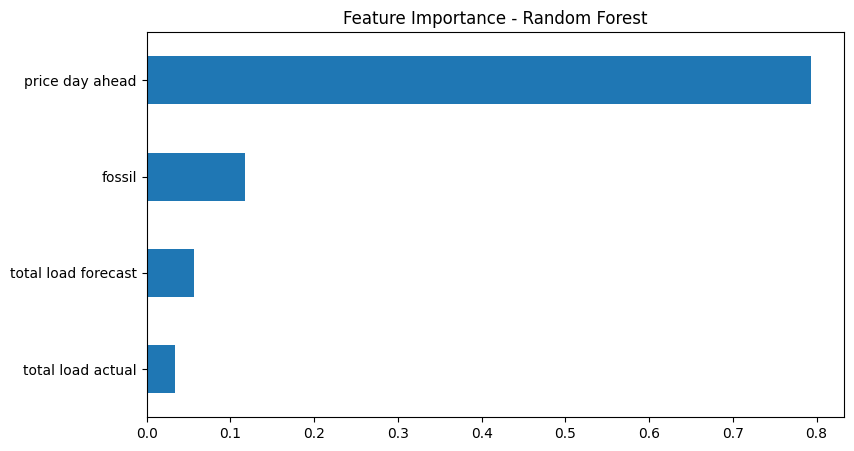

In [ ]:
##display importance variable
importances = pd.Series(model_RF2.feature_importances_, index=X_train1.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(9,5))
plt.title("Feature Importance - Random Forest")

###Perform XGboost analysis on the 24H dataset to evaluate the differences.

In [ ]:
!pip install xgboost

In [586]:
#implement XG Boost
import xgboost as xgb
model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=10,
    learning_rate=0.01,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=0

)
model.fit(X_train1, Y_train1)
xgbpred=model.predict(X_test1)

In [587]:
XGB_RMSE = np.sqrt(mean_squared_error(Y_test1, xgbpred))
XGB_MAE = mean_squared_error(Y_test1,xgbpred)
XGB_R2 = r2_score(Y_test1, xgbpred)

print(f"\nXGB_RMSE:{XGB_RMSE:.2f}")
print(f"XGB_MAE:{XGB_MAE}")
print(f"XGB_R2:{XGB_R2:.4f}")


XGB_RMSE:7.34
XGB_MAE:53.91128778898428
XGB_R2:0.1828


`XG BOOST gradient`

interestingly both model presenting totally identical result of evaluation metrics. This shows that the impact on the R2 are highly influenced by features selection.


###Perform training with highest importances


In [ ]:
train.columns

Index(['year', 'month', 'total load forecast', 'total load actual',
       'price day ahead', 'fossil', 'price'],
      dtype='object')

In [ ]:
X_train2 = train.drop(columns=['price','year','month','fossil','total load forecast','total load actual'])
Y_train2 = train['price'].values
X_test2 = test.drop(columns=['price','year','month','fossil','total load forecast','total load actual'])
Y_test2 = test['price'].values
#

In [ ]:
#verify the features
X_train2.columns

Index(['price day ahead'], dtype='object')

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200,300,],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2
)
grid_search.fit(X_train2, Y_train2)
print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf

In [ ]:
#Highest important variables train in randomforest
model_RFV1 = RandomForestRegressor(
    n_estimators=300,
    max_depth=5,
    random_state=42,
    min_samples_split=5,
    min_samples_leaf=1,
)
model_RFV1.fit(X_train2, Y_train2)
YpredSV = model_RFV1.predict(X_test2)

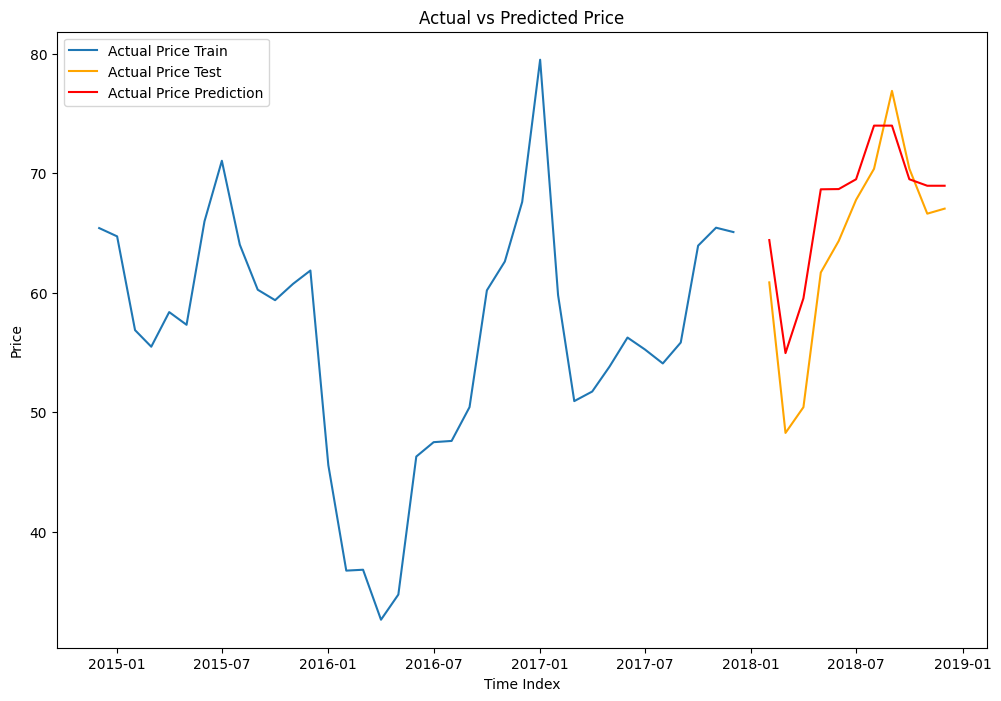


RMSE:4.69
RF2_MAE:22.01040950762808
RF2_R2:0.6664


In [588]:
#plot actual vs prediction based on 24H
plt.figure(figsize=(12,8))
plt.plot(X_train2.index, Y_train2, label='Actual Price Train')
plt.plot(X_test2.index,Y_test2, label='Actual Price Test', color='orange')
plt.plot(X_test2.index, YpredSV, label='Actual Price Prediction', color='red')
plt.title('Actual vs Predicted Price')
plt.xlabel('Time Index')
plt.ylabel('Price')
plt.legend()
plt.show()

##evaluation metric
RF3_RMSE = np.sqrt(mean_squared_error(Y_test2, YpredSV))
RF3_MAE = mean_squared_error(Y_test2,YpredSV)
RF3_R2 = r2_score(Y_test2, YpredSV)

print(f"\nRMSE:{RF3_RMSE:.2f}")
print(f"RF2_MAE:{RF3_MAE}")
print(f"RF2_R2:{RF3_R2:.4f}")

**Apply Gridsearch to fine tune**

`Discussion on important variable`

With implement important variable evaluation, the result of the model prediction is not as good as with feature with 2 0.4 correlation coefficient. the lower R2 compare to the multi features in first attempt might due to less information intake for model to study the dataset pattern which is overfitting.

By observing the prediction trend, the prediction output is havine similar trend compare with test dataset. However the R2 is only 0.66, this seem to be overfitting symptom of a model.

#Metrics comparison


In [590]:
Metrics={
    "Model": ["Random Forest Regression 1", "Multi-Features Random Forest Regression 2", "Single Feature Random Forest Regression 3", "XG BOOST"],
    "RMSE":[RF1_RMSE, RF2_RMSE, RF3_RMSE, XGB_RMSE],
    "MAE":[RF1_MAE, RF2_MAE, RF3_MAE, XGB_MAE],
    "R2":[RF1_R2, RF2_R2, RF3_R2, XGB_R2],
    "description":['Hour index base','monthly index base with multi-Features', 'monthly index base wiht single feature from function important features', 'monthly index base with XG Boost model']
}
TabMetrics = pd.DataFrame(Metrics)
TabMetrics.style.set_caption("Metrics Comparison")

,Model,RMSE,MAE,R2,description
0,Random Forest Regression 1,9.386856,88.113074,0.390300,Hour index base
1,Multi-Features Random Forest Regression 2,3.840687,14.750880,0.776404,monthly index base with multi-Features
2,Single Feature Random Forest Regression 3,4.691525,22.010410,0.666363,monthly index base wiht single feature from function important features
3,XG BOOST,7.342431,53.911288,0.182805,monthly index base with XG Boost model


#`Discussion`
The price prediction for different variable which include features below:
```markdown
1. price day ahead
2. generation fossil hard coal
3. total load actual
4. generation fossil gas
5. total load forecast
```
These selection was based on the correlation of heatmap that with a threshold more than 0.4 as the target variable input benchmark.

The result of the model shows that which is a low performance prediction model. which because of the error indicator from the model evaluation.
```markdown
1. RMSE for model RF1 shows a value of 9.46, this indicate that a 9.46 price different compare to actual value. Hence, shows the prediction trend and actual trend a closely resemble to each other.
2. MAE for model RF1 shows a value of 89.4286, this presenting the precision of the model. the average miss per prediction is shows a steady trend that resemble with actual dataset.
3. R^2 Score shows a 0.4001, this represent a 40% of price variation is caption in the figure. comparing to linear regression, this model shows a higher R2.
```

Based on these statistic, we can conclude with these hypothesis:
```markdown
1. the fluatuation in price show that, price are easily influenced by certain type of energy source which is `generation fossil hard coal` and `generation fossil gas`. This two type of sources are externally influence by political and also economical.
2. The linear regression present that the price is gradually increase overtime. which this is true due to several factors are influencing the fluactuation of the price overtime.
```

However, in RandomForestRegression does not successfully predict the increase in price changing overtime but it shows a high fluactuation while stable price value. This was because of except feature `price day ahead` has the highest correlation to the `price actual` while other is below 0.5. Hence, shows a very poor relation for become prediciton input which also indicate less impact on target features.

#`Conclusion`


In `Analysis 2` show that train-test split method has high influence on model prediction performance. By reducing the date to monthly dramatiscally increase the R2 evaluation to 0.77 compare to `Analysis 1` which as has a 0.40 as R2. The difference in volume of data resulting less noise for model to pick up. Interestingly, even using other model to learn the dataset pattern are eventually end up to a similar evaluation in error. Hence, the range of the data or to be specific, the difference in period has a huge influence to the model when it come to learning pattern.

# **Final Summary and Insights**

## **Project Goal**
The goal of this project was to **forecast the actual electricity price** using energy generation, load, and market data (with some weather data for advanced modeling). The focus was on comparing a baseline model (Linear Regression) with an advanced machine learning model (Random Forest).

---

## **Key Findings**
- **Top Features:**  
  `price day ahead`, `generation fossil hard coal`, `generation fossil gas`, `generation fossil brown coal/lignite`, and `total load actual` were found to be the most influential features for price forecasting.
  
- **Model Performance:**  
  - **Random Forest** outperformed Linear Regression, achieving a lower RMSE and higher R² score on the test set.
  - The model effectively captured non-linear relationships between generation/load features and price.

- **Weather Data Impact:**  
  Adding weather-related features provided slight improvements in prediction accuracy, suggesting weather has some influence on price patterns.

---

## **Next Steps**
1. **Further Hyperparameter Tuning:** Use GridSearchCV or RandomizedSearchCV for optimized Random Forest parameters.
2. **Advanced Models:** Experiment with Gradient Boosting (XGBoost, LightGBM) or LSTM models for time-series forecasting.
3. **Feature Expansion:** Consider creating lag features (e.g., price(t-1)) and seasonal indicators (e.g., day of week, month).

---

## **Conclusion**
The project successfully met the **Month 2 mini project goal** by building and evaluating machine learning models for price forecasting. Random Forest was identified as the best-performing model for this dataset.
